# Lecture 6 - Cov-SSI on shear frame using KOMA - stabilization

In [100]:
import koma.oma, koma.plot
import numpy as np
import matplotlib.pyplot as plt

from scipy.signal import detrend, welch, resample
from newmark import newmark_lin
from kak import plot_mode, plot_all_modes, statespace as to_A, shearframe

import matplotlib.pyplot as plt

def stabplot_simple(lambd, orders, ax=None):
    if ax is None:
        ax = plt.gca()
        
    plt.gcf().set_figwidth(12)
        
    ax.plot(np.abs(lambd)/2/np.pi, orders, '.')
    ax.set_xlabel('$f_n$ [Hz]')
    ax.set_ylabel('Order, n')
    
    return ax
    

## System definition

In [4]:
levels = 5

k = 8000
m = 500
c = 50

fs = 12.0
tmax = 1200

K, C, M, __ = shearframe(levels, k, c, m, relative_dampers=False)

t = np.arange(0, tmax, 1/fs)

u0 = np.zeros([levels])
udot0 = u0*1

f = np.random.randn(levels, len(t))*1000
displacement, __, acceleration = newmark_lin(K, C, M, f, t, u0, udot0)

data = displacement.T

## Analytical eigenvalue solution

In [5]:
A = to_A(K, C, M) # establish state matrix based on K, C and M
lambdai, qi = np.linalg.eig(A)

ix = np.argsort(np.abs(lambdai))
xi_ref = -np.real(lambdai[ix][::2])/np.abs(lambdai[ix][::2])
omega_n_ref = np.abs(lambdai[ix][::2])
phi_ref = np.real(qi[:int(len(ix)/2), ix[::2]])

## Add artificial noise

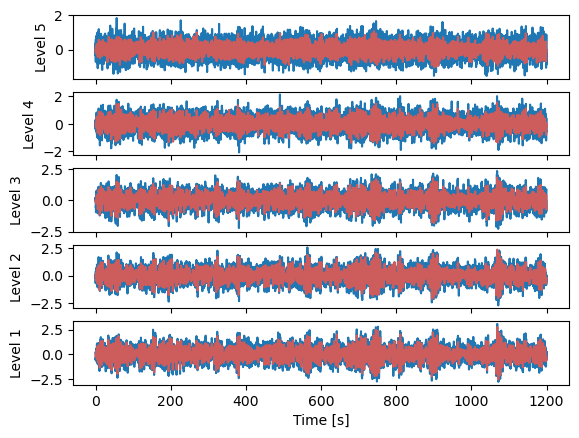

In [8]:
noise_factor = 0.6
noise = np.std(data) * noise_factor
data_noised = data + noise*np.random.randn(data.shape[0], data.shape[1])

fig, ax = plt.subplots(nrows=levels, ncols=1, num=1, sharex =True)

for level, axi in enumerate(ax[::-1]):    
    axi.plot(t, data_noised[:,level])
    axi.plot(t, data[:,level], color='IndianRed', alpha=1)
    axi.set_ylabel(f'Level {level+1}')

__ = ax[-1].set_xlabel('Time [s]')

## Define SSI parameters

In [71]:
i = 50
orders_input = np.arange(2, 60+2, 2)

## Cov-SSI call

In [72]:
lambd, phi, orders = koma.oma.covssi(data_noised, fs, i, orders_input, return_flat=True) # find poles by Cov-SSI

*** Covariance-driven SSI algorithm for OMA ***
> Establishing Hankel/Toeplitz matrices
  >> Correlation estimation
  >> Matrix stacking
> Establishing weighting matrices
  >> Weighting requested: NONE
> Computing SVD
> Computing state matrix for each order to establish modes
> Computation completed


## Stabilization analysis

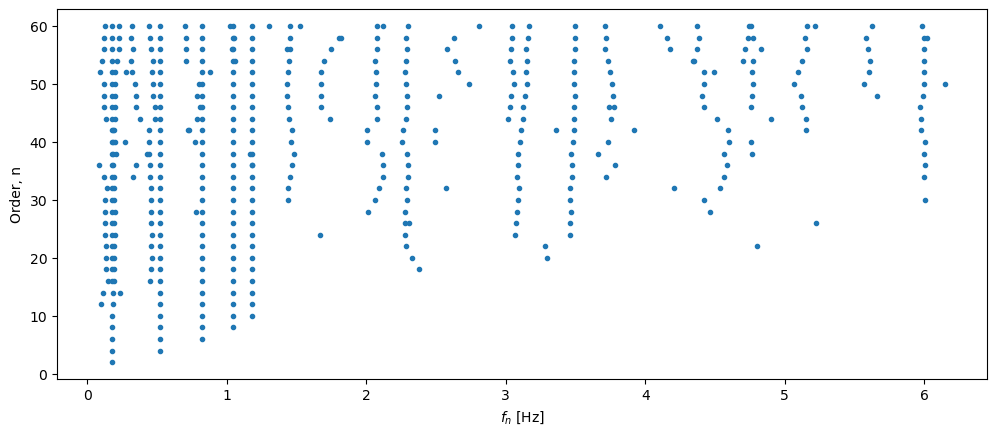

In [105]:
ax = stabplot_simple(lambd, orders)
xlim = ax.get_xlim()

(-0.2162820390439782, 6.448808978000201)

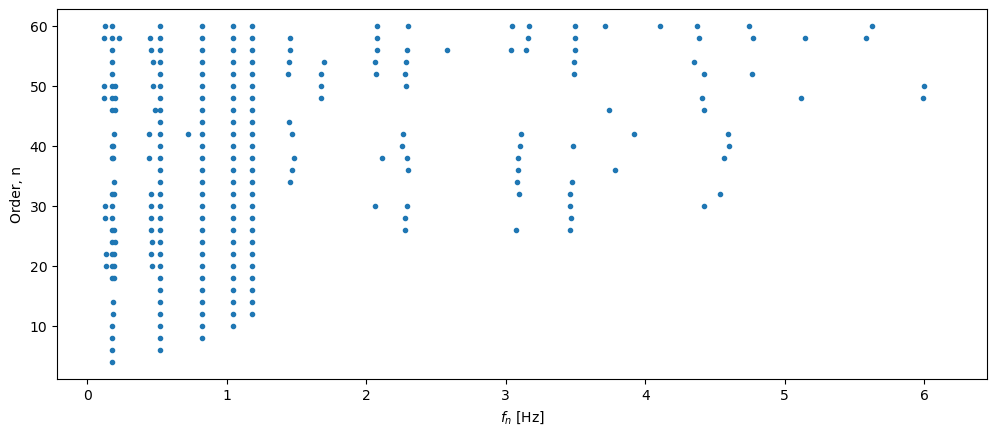

In [106]:
s = 1
stabcrit = {'freq':0.1, 'damping': 0.2, 'mac': 0.2}

lambd_stab, phi_stab, orders_stab, ix_stab = koma.oma.find_stable_poles(lambd, phi, orders, s, 
                                                                        stabcrit=stabcrit, use_legacy=False) # Stable poles

ax = stabplot_simple(lambd_stab, orders_stab)
ax.set_xlim(xlim)

(-0.2162820390439782, 6.448808978000201)

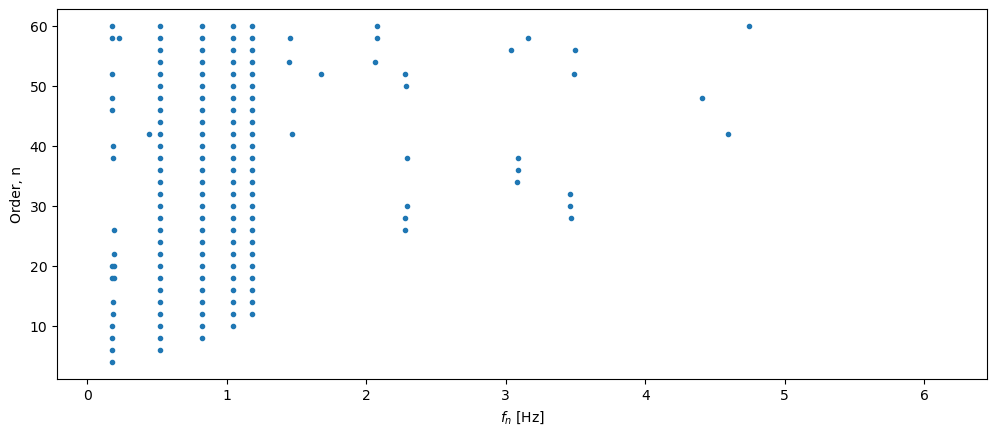

In [107]:
s = 1
stabcrit = {'freq':0.01, 'damping': 0.05, 'mac': 0.05}

lambd_stab, phi_stab, orders_stab, ix_stab = koma.oma.find_stable_poles(lambd, phi, orders, s, 
                                                                        stabcrit=stabcrit, use_legacy=False) # Stable poles
ax = stabplot_simple(lambd_stab, orders_stab)
ax.set_xlim(xlim)

(-0.2162820390439782, 6.448808978000201)

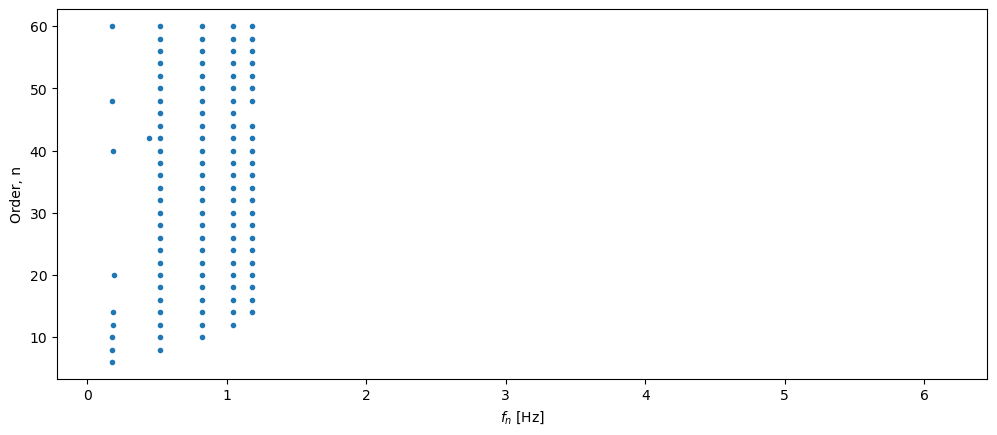

In [108]:
s = 2
stabcrit = {'freq':0.01, 'damping': 0.05, 'mac': 0.05}

lambd_stab, phi_stab, orders_stab, ix_stab = koma.oma.find_stable_poles(lambd, phi, orders, s, 
                                                                        stabcrit=stabcrit, use_legacy=False) # Stable poles

ax = stabplot_simple(lambd_stab, orders_stab)
ax.set_xlim(xlim)

In [ ]:
s = 4
stabcrit = {'freq':0.01, 'damping': 0.01, 'mac': 0.1}

lambd_stab, phi_stab, orders_stab, ix_stab = koma.oma.find_stable_poles(lambd, phi, orders, s, 
                                                                        stabcrit=stabcrit) # Stable poles

ax = stabplot_simple(lambd_stab, orders_stab)
ax.set_xlim(xlim)